In [1]:
import pandas as pd
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


In [2]:
print(customers.info())
print(customers.describe(include='all'))
print(customers['Region'].value_counts())
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
print(customers['SignupYear'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
SignupYear
2024    79
2022    64
2023    57
Name: count, dtype: int64


In [3]:
print(products.info())
print(products['Category'].value_counts())
print(products['Price'].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [ ]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
print(transactions.info())
print(transactions['TransactionMonth'].value_counts())
print(transactions['TotalValue'].describe())


In [4]:
transactions_customers = pd.merge(transactions, customers, on='CustomerID', how='inner')

full_data = pd.merge(transactions_customers, products, on='ProductID', how='inner')

print(full_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  SignupYear  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03        2022   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04        2024   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04        2024   
3      601.36   300.68  Travis Campbell  South America 2024-04-11        2024   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15        2022   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth 

In [ ]:

category_revenue = full_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_revenue)

region_revenue = full_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_revenue)


TOP- REVENUE GENERATING CATEGORIES


In [17]:
import plotly.express as px
import pandas as pd

#  revenue by category
category_revenue = full_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).reset_index()


fig = px.bar(
    category_revenue,
    x='Category',
    y='TotalValue',
    title='Top Revenue-Generating Categories',
    text='TotalValue',
    color='Category',
    labels={'TotalValue': 'Total Revenue (USD)', 'Category': 'Product Category'},
    template='plotly_dark'
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Total Revenue (USD)',
    showlegend=False,
    title_x=0.5,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()


In [27]:
transactions_customers = pd.merge(transactions, customers, on="CustomerID", how="inner")
full_data = pd.merge(transactions_customers, products, on="ProductID", how="inner")


# Calculate total revenue per region
region_revenue = full_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False).reset_index()


# Print the revenue data
print("Revenue by Region:")
print(region_revenue)

# Create interactive bar plot using Plotly
fig = px.bar(
    region_revenue,
    x="Region",
    y="TotalValue",
    title="Revenue by Region",
    labels={"Region": "Region", "TotalValue": "Total Revenue (USD)"},
    color="Region",
    hover_data=['TotalValue'],
    height = 500
)


fig.update_traces(marker_line_color='black',
                  marker_line_width=1.2,
                  opacity=0.8)

fig.update_layout(
    title_font=dict(size=20),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    xaxis_tickangle=-45,
    margin=dict(b=100),
)
fig.show()

Revenue by Region:
          Region  TotalValue
0  South America   219352.56
1         Europe   166254.63
2  North America   152313.40
3           Asia   152074.97


Region Wise Revenue

In [19]:
import plotly.express as px

region_coordinates = {
    "Asia": {"lat": 34.0479, "lon": 100.6197},
    "Europe": {"lat": 54.5260, "lon": 15.2551},
    "North America": {"lat": 54.5260, "lon": -105.2551},
    "South America": {"lat": -14.2350, "lon": -51.9253},
}

region_revenue['lat'] = region_revenue['Region'].map(lambda x: region_coordinates[x]['lat'])
region_revenue['lon'] = region_revenue['Region'].map(lambda x: region_coordinates[x]['lon'])


fig = px.scatter_geo(
    region_revenue,
    lat='lat',
    lon='lon',
    size='TotalValue',
    hover_name='Region',
    title='Region-wise Revenue Distribution',
    size_max=50,
    template='plotly',
    color='TotalValue',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_layout(
    title_x=0.5,
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth")
)


fig.show()


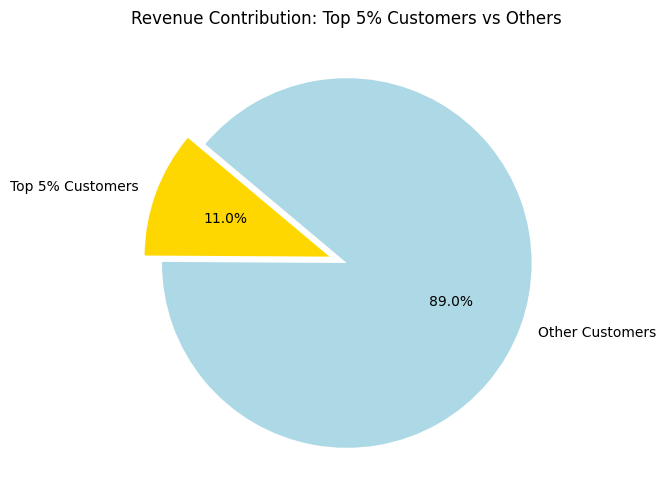

In [25]:
import matplotlib.pyplot as plt

#  revenue contribution for visualization
others_revenue = total_revenue - top_customers.sum()
revenue_data = [top_customers.sum(), others_revenue]
labels = ['Top 5% Customers', 'Other Customers']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    revenue_data,
    labels=labels,
    autopct='%1.1f%%',
    colors=['gold', 'lightblue'],
    startangle=140,
    explode=(0.1, 0)
)
plt.title('Revenue Contribution: Top 5% Customers vs Others')
plt.show()


Monthly Sales:
TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


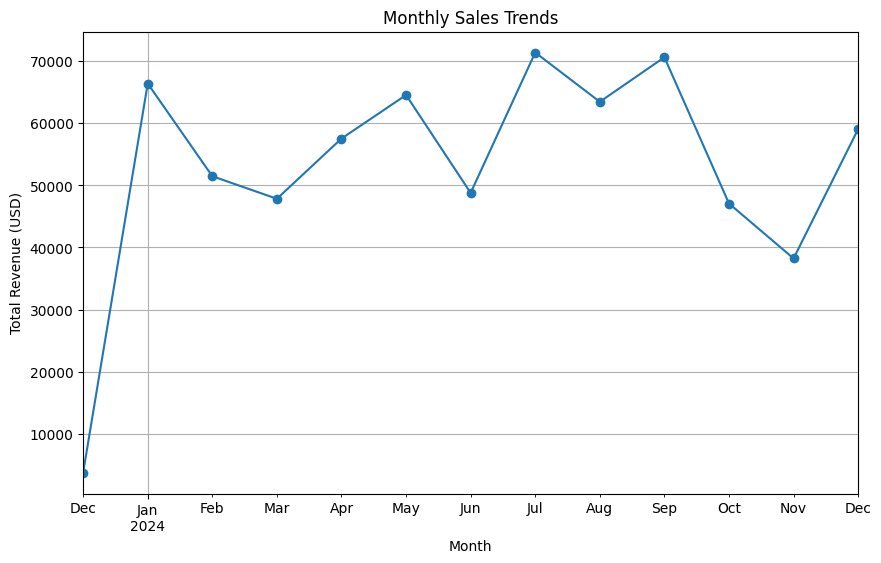

In [12]:
# monthly revenue
monthly_sales = full_data.groupby('TransactionMonth')['TotalValue'].sum()

#monthly sales
print("Monthly Sales:")
print(monthly_sales)

monthly_sales.plot(kind='line', title='Monthly Sales Trends', marker='o', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.grid()
plt.show()


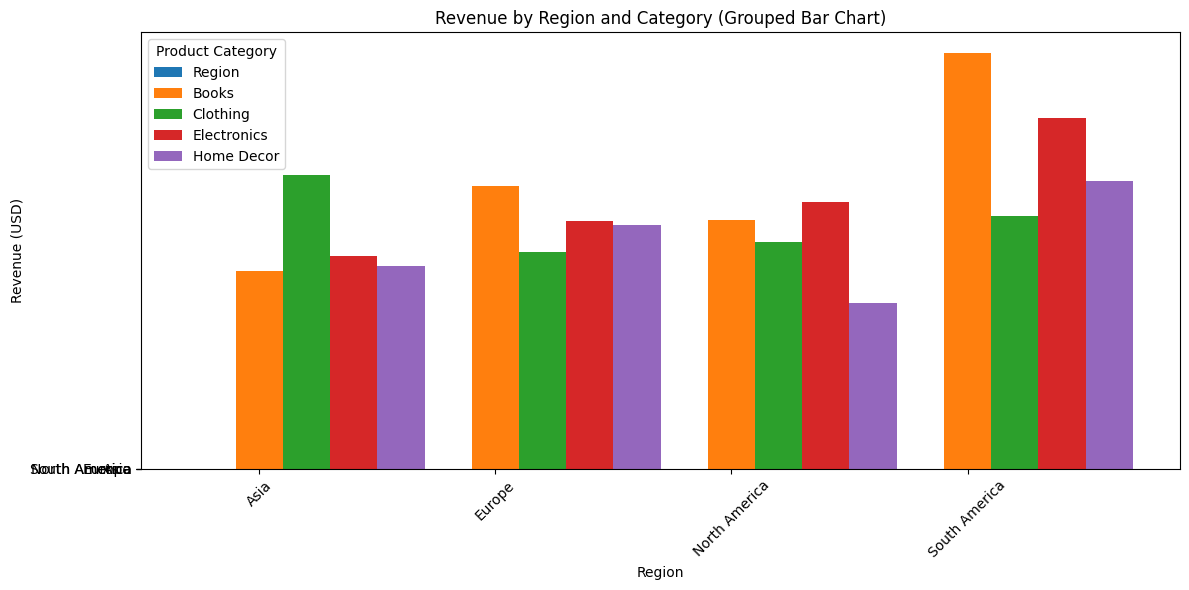

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the DataFrame to a format suitable for grouped bar charts
region_category_revenue.reset_index(inplace=True)

# Define the x-axis positions and width of bars
regions = region_category_revenue['Region']
categories = region_category_revenue.columns[1:]
x = np.arange(len(regions))  # The label locations
bar_width = 0.2

# Create grouped bars for each category
plt.figure(figsize=(12, 6))
for i, category in enumerate(categories):
    plt.bar(
        x + i * bar_width,
        region_category_revenue[category],
        width=bar_width,
        label=category
    )

# Add labels, title, and legend
plt.xlabel('Region')
plt.ylabel('Revenue (USD)')
plt.title('Revenue by Region and Category (Grouped Bar Chart)')
plt.xticks(x + bar_width, regions, rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()



Revenue by Category and Region:
Category          Books  Clothing  Electronics  Home Decor
Region                                                    
Asia           33119.03  49353.09     35658.15    33944.70
Europe         47464.42  36335.59     41562.60    40892.02
North America  41811.99  38038.49     44716.43    27746.49
South America  69752.03  42443.49     58846.32    48310.72


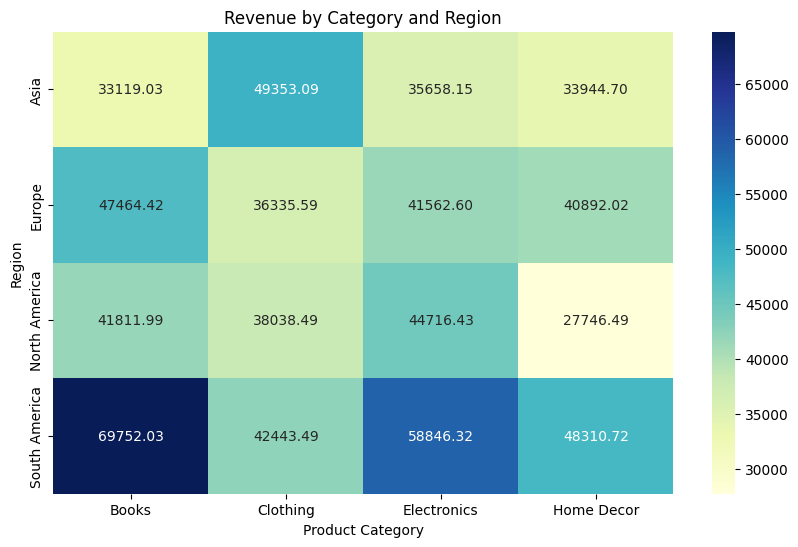

In [15]:
# Group by Region and Category to calculate total revenue
region_category_revenue = full_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()

# Print the revenue table
print("Revenue by Category and Region:")
print(region_category_revenue)

# Visualization: Heatmap for better understanding
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(region_category_revenue, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('Revenue by Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.show()
